In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load and select data

In [2]:
df_short = pd.read_csv('results/logs_results_short.csv')
models = np.array((df_short.iloc[:,0]))

In [3]:
mask_vgg16_cifar10 = ['vgg' in x and 'cifar10' in x and 'cifar100' not in x for x in models]
mask_resnet18_cifar10 = ['res' in x and 'cifar10' in x and 'cifar100' not in x for x in models]
mask_vgg16_cifar100 = ['vgg' in x and 'cifar100' in x for x in models]
mask_resnet18_cifar100 = ['res' in x and 'cifar100' in x for x in models]

In [4]:
vgg16_cifar10 = df_short[df_short.iloc[:,0].isin(models[mask_vgg16_cifar10])]
resnet18_cifar10 = df_short[df_short.iloc[:,0].isin(models[mask_resnet18_cifar10])]
vgg16_cifar100 = df_short[df_short.iloc[:,0].isin(models[mask_vgg16_cifar100])]
resnet18_cifar100 = df_short[df_short.iloc[:,0].isin(models[mask_resnet18_cifar100])]

### Select best learning rate

In [5]:
def select_lr(df):
    df['sum'] = df.apply(lambda r: r.iloc[1:].sum(), axis=1)
    df['lr'] = df.apply(lambda r: r.iloc[0][-8:][:4], axis=1)
    return df.groupby(['lr'])['sum'].sum().idxmax()

In [6]:
%%capture warning
lr_vgg16_cifar10 = select_lr(vgg16_cifar10)
lr_res18_cifar10 = select_lr(resnet18_cifar10)
lr_vgg16_cifar100 = select_lr(vgg16_cifar100)
lr_res18_cifar100 = select_lr(resnet18_cifar100)

In [7]:
vgg16_cifar10 = vgg16_cifar10[vgg16_cifar10['lr'] == lr_vgg16_cifar10]
resnet18_cifar10 = resnet18_cifar10[resnet18_cifar10['lr'] == lr_res18_cifar10]
vgg16_cifar100 = vgg16_cifar100[vgg16_cifar100['lr'] == lr_vgg16_cifar100]
resnet18_cifar100 = resnet18_cifar100[resnet18_cifar100['lr'] == lr_res18_cifar100]

### Plot reproduced results

In [8]:
def plot(df):
    pass

In [9]:
def plot_and_save(df, y, x = [2, 4, 8, 16, 32, 64], dir_dest='plots'):
    name = df.iloc[0, 0][:-9]
    model = name.split('_')[0]
    data = name.split('_')[1]
    lr = lr = float(df.iloc[0, 9][-2:]) / 100

    l02 = list(df.iloc[0][2:-2])
    l04 = list(df.iloc[1][2:-2])
    l08 = list(df.iloc[2][2:-2])
    l16 = list(df.iloc[3][2:-2])

    fig, axs = plt.subplots(1)

    # Title and legends
    axs.set_title('{mod} {data} \n learning rate {lr}'.format(mod=model, data=data, lr=lr), fontsize = 12)
    axs.set_xlabel('Simulation time-steps')
    axs.set_ylabel('Accuracy')

    # Data
    axs.plot(np.arange(len(x)), l02, marker='*', label='L=2')
    axs.plot(np.arange(len(x)), l04, marker='*', label='L=4')
    axs.plot(np.arange(len(x)), l08, marker='*', label='L=8')
    axs.plot(np.arange(len(x)), l16, marker='*', label='L=16')

    # Axis options
    axs.xaxis.set_ticks(np.arange(len(x)))
    axs.xaxis.set_ticklabels(x)
    axs.yaxis.set_ticks(y)

    # Style options
    plt.grid()
    plt.legend(loc=4)
    axs.set_facecolor('whitesmoke')

    plt.savefig(os.path.join(dir_dest, '{name}.png'.format(name=name)))
    plt.show();

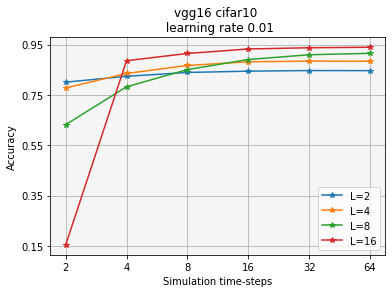

In [10]:
plot_and_save(vgg16_cifar10, y = [0.15, 0.35, 0.55, 0.75, 0.95])

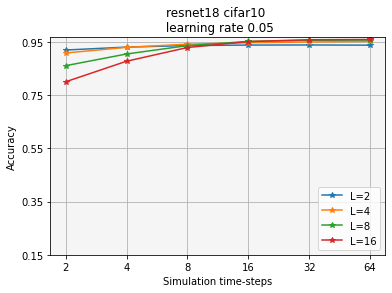

In [11]:
plot_and_save(resnet18_cifar10, y = [0.15, 0.35, 0.55, 0.75, 0.95])

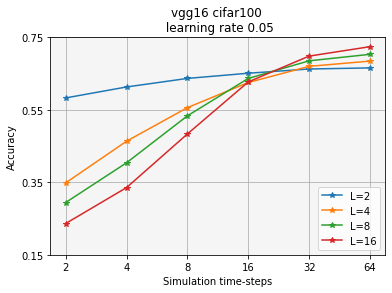

In [12]:
plot_and_save(vgg16_cifar100, y = [0.15, 0.35, 0.55, 0.75])

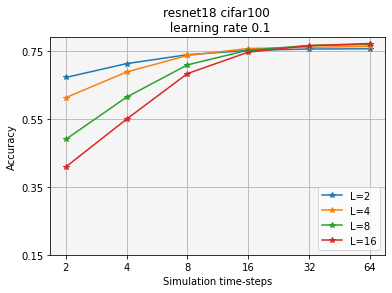

In [13]:
plot_and_save(resnet18_cifar100, y = [0.15, 0.35, 0.55, 0.75])